### Load data

In [3]:
# load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
finaldf = pd.read_csv('csv1_final_loan_XGBoost_IncomeLoanLimits_2007_2022-includeCountyStateCodes-SUBMIT')
finaldf

,year,loan_type,loan_purpose,loan_amount_000s,action_taken,state,state_code,county_code,applicant_income_000s,denial_reason_1,income_range,loan_amount_range,denial_rate_%
0,2007,2,1,105.0,3,NC,37.0,159.0,34.0,1.0,(28-42],(0-300],14.851485
1,2007,2,1,148.0,2,NC,37.0,193.0,60.0,NaN,(56-70],(0-300],16.666667
2,2007,2,1,151.0,1,TN,47.0,157.0,53.0,NaN,(42-56],(0-300],10.566038
3,2007,2,1,103.0,6,SD,46.0,65.0,23.0,NaN,(14-28],(0-300],16.666667
4,2007,2,1,30.0,2,NC,37.0,165.0,19.0,NaN,(14-28],(0-300],16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696474,2022,2,1,165.0,3,AL,1.0,49.0,53.0,9.0,(42-56],(0-300],14.634146
11696475,2022,2,1,225.0,1,GA,13.0,63.0,48.0,10.0,(42-56],(0-300],16.459627
11696476,2022,2,1,225.0,1,PA,42.0,125.0,57.0,10.0,(56-70],(0-300],3.750000
11696477,2022,2,1,295.0,1,AZ,4.0,13.0,61.0,10.0,(56-70],(0-300],15.560166


In [4]:
df = finaldf[finaldf.year <= 2017]
df

,year,loan_type,loan_purpose,loan_amount_000s,action_taken,state,state_code,county_code,applicant_income_000s,denial_reason_1,income_range,loan_amount_range,denial_rate_%
0,2007,2,1,105.0,3,NC,37.0,159.0,34.0,1.0,(28-42],(0-300],14.851485
1,2007,2,1,148.0,2,NC,37.0,193.0,60.0,NaN,(56-70],(0-300],16.666667
2,2007,2,1,151.0,1,TN,47.0,157.0,53.0,NaN,(42-56],(0-300],10.566038
3,2007,2,1,103.0,6,SD,46.0,65.0,23.0,NaN,(14-28],(0-300],16.666667
4,2007,2,1,30.0,2,NC,37.0,165.0,19.0,NaN,(14-28],(0-300],16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051483,2017,2,1,42.0,3,IL,17.0,39.0,47.0,3.0,(42-56],(0-300],16.666667
9051484,2017,2,1,172.0,2,CT,9.0,9.0,70.0,NaN,(56-70],(0-300],13.769124
9051485,2017,2,1,76.0,1,LA,22.0,17.0,19.0,NaN,(14-28],(0-300],20.161290
9051486,2017,2,1,99.0,1,LA,22.0,17.0,28.0,NaN,(14-28],(0-300],20.161290


In [5]:
# check which columns have NaN values
nan_columns = finaldf.columns[finaldf.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['denial_reason_1']


In [6]:
# change NaN to None in denial_reason_1 column
finaldf['denial_reason_1'] = finaldf['denial_reason_1'].fillna("None")

In [7]:
# Ensure no columns have NaN values
nan_columns = finaldf.columns[finaldf.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)
finaldf

Columns with NaN values: []


,year,loan_type,loan_purpose,loan_amount_000s,action_taken,state,state_code,county_code,applicant_income_000s,denial_reason_1,income_range,loan_amount_range,denial_rate_%
0,2007,2,1,105.0,3,NC,37.0,159.0,34.0,1.0,(28-42],(0-300],14.851485
1,2007,2,1,148.0,2,NC,37.0,193.0,60.0,None,(56-70],(0-300],16.666667
2,2007,2,1,151.0,1,TN,47.0,157.0,53.0,None,(42-56],(0-300],10.566038
3,2007,2,1,103.0,6,SD,46.0,65.0,23.0,None,(14-28],(0-300],16.666667
4,2007,2,1,30.0,2,NC,37.0,165.0,19.0,None,(14-28],(0-300],16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696474,2022,2,1,165.0,3,AL,1.0,49.0,53.0,9.0,(42-56],(0-300],14.634146
11696475,2022,2,1,225.0,1,GA,13.0,63.0,48.0,10.0,(42-56],(0-300],16.459627
11696476,2022,2,1,225.0,1,PA,42.0,125.0,57.0,10.0,(56-70],(0-300],3.750000
11696477,2022,2,1,295.0,1,AZ,4.0,13.0,61.0,10.0,(56-70],(0-300],15.560166


### Sort by year and exclude outliers

In [8]:
# Exclude extreme outliers for denial rates
df = df[(df['denial_rate_%'] <= 22) & (df['denial_rate_%'] > 0)]
df = df.sort_values(by='year')
df.reset_index(drop=True, inplace=True)
df

,year,loan_type,loan_purpose,loan_amount_000s,action_taken,state,state_code,county_code,applicant_income_000s,denial_reason_1,income_range,loan_amount_range,denial_rate_%
0,2007,2,1,144.0,6,GA,13.0,135.0,35.0,NaN,(28-42],(0-300],15.461847
1,2007,2,1,163.0,1,OH,39.0,85.0,40.0,NaN,(28-42],(0-300],18.243243
2,2007,2,1,250.0,3,MD,24.0,13.0,59.0,1.0,(56-70],(0-300],10.344828
3,2007,2,1,152.0,6,OH,39.0,85.0,48.0,NaN,(42-56],(0-300],10.958904
4,2007,2,1,161.0,1,LA,22.0,103.0,58.0,NaN,(56-70],(0-300],11.340206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171524,2017,2,1,96.0,1,OH,39.0,153.0,42.0,NaN,(28-42],(0-300],9.475465
8171525,2017,2,1,158.0,1,CT,9.0,9.0,53.0,NaN,(42-56],(0-300],14.149822
8171526,2017,2,1,102.0,1,OH,39.0,153.0,55.0,NaN,(42-56],(0-300],10.101010
8171527,2017,2,1,264.0,1,CA,6.0,23.0,51.0,NaN,(42-56],(0-300],14.285714


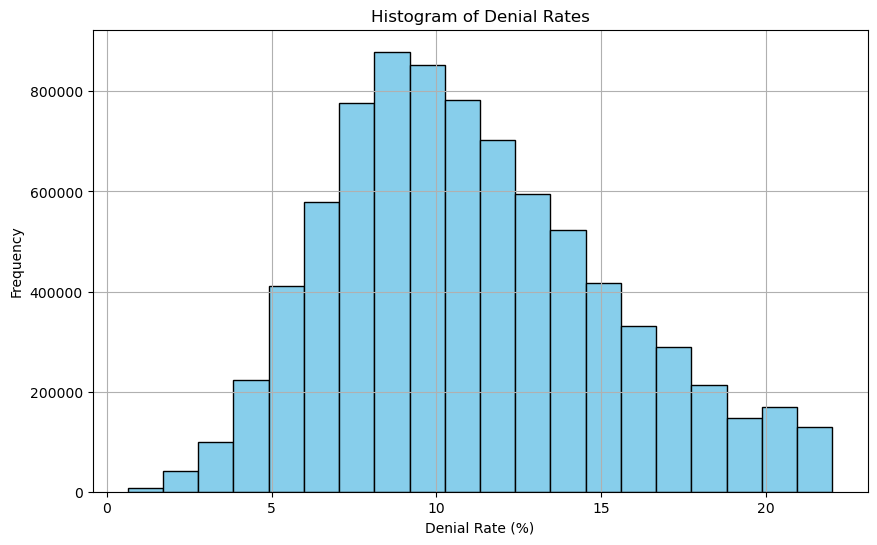

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of denial rates 
plt.figure(figsize=(10, 6))
plt.hist(df['denial_rate_%'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Denial Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Denial Rates')
plt.grid(True)
plt.show()

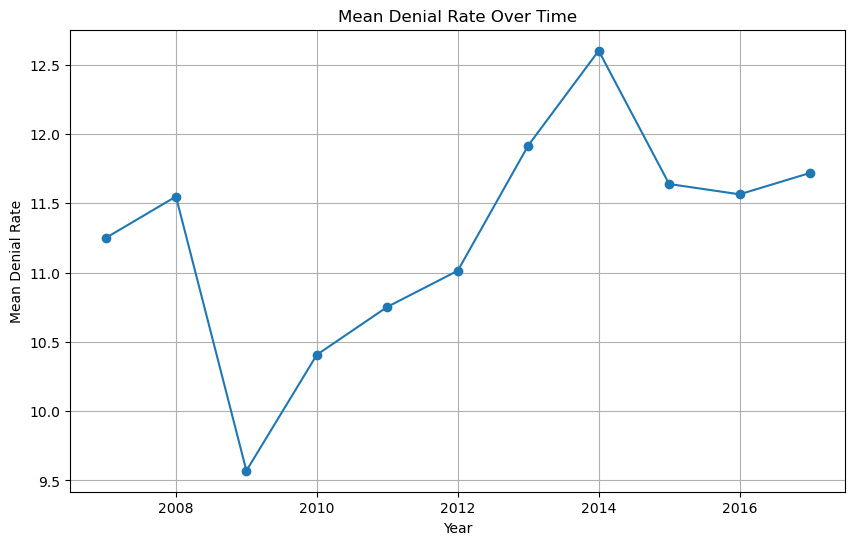

In [10]:
# Mean denial rate over time scatterplot
denial_rate_by_year = df.groupby('year')['denial_rate_%'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(denial_rate_by_year.index, denial_rate_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Denial Rate')
plt.title('Mean Denial Rate Over Time')
plt.grid(True)
plt.show()

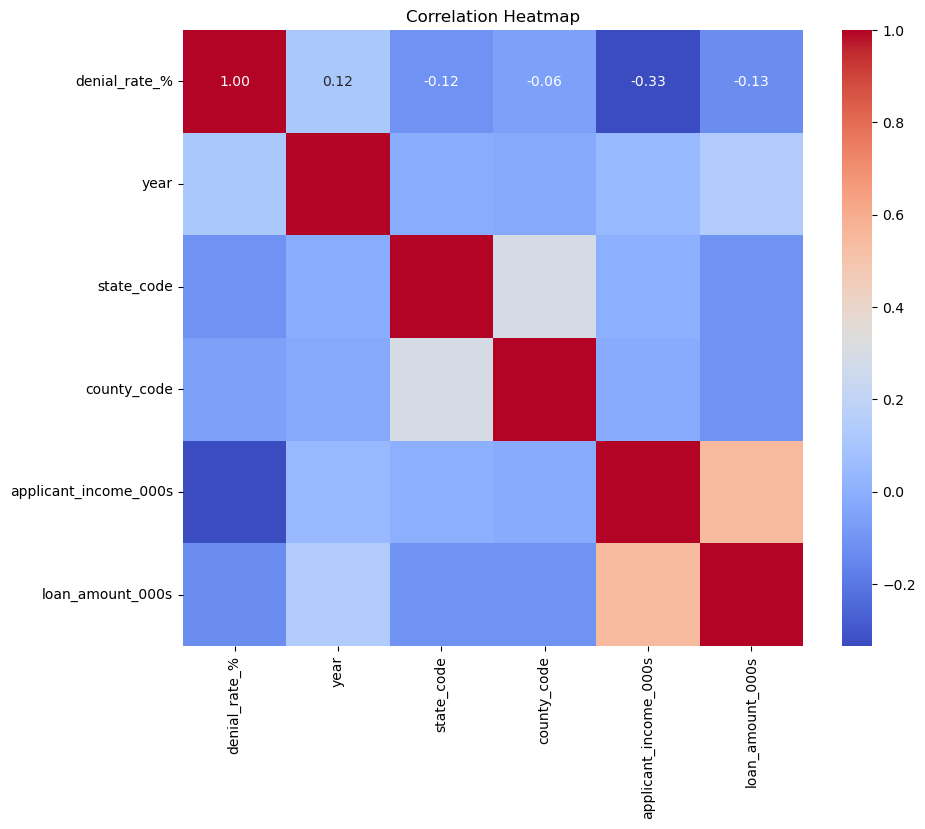

In [11]:
columns_to_use = ['denial_rate_%', 'year', 'state_code', 'county_code', 'applicant_income_000s', 'loan_amount_000s']
correlation_matrix = df[columns_to_use].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Take log of denial rates

In [12]:
df['denial_rate_%'].skew()

0.4444839596069646

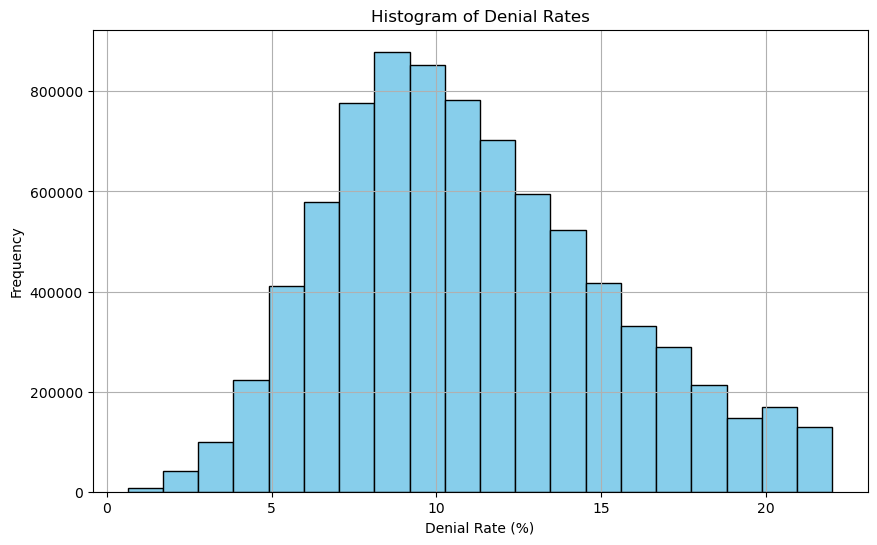

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of denial rates 
plt.figure(figsize=(10, 6))
plt.hist(df['denial_rate_%'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Denial Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Denial Rates')
plt.grid(True)
plt.show()

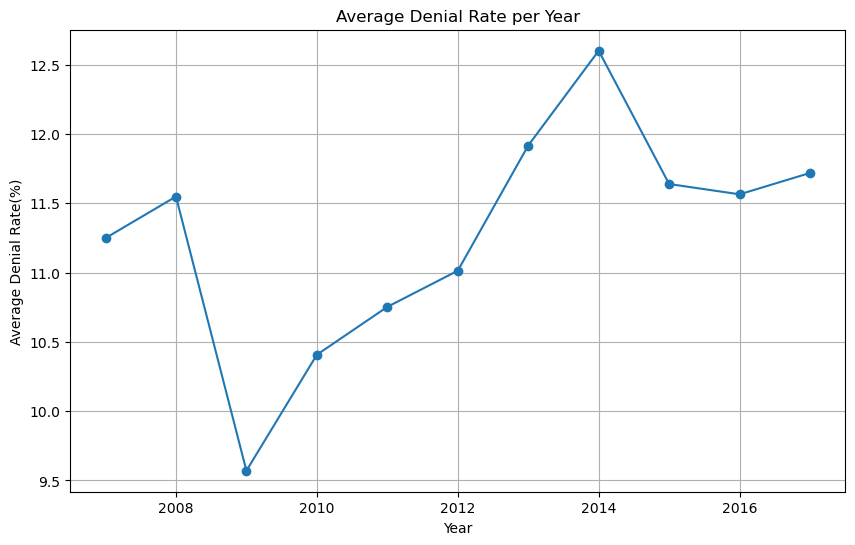

In [14]:
# Mean denial rate over time scatterplot
denial_rate_by_year = df.groupby('year')['denial_rate_%'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(denial_rate_by_year.index, denial_rate_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Denial Rate(%)')
plt.title('Average Denial Rate per Year')
plt.grid(True)
plt.show()

## Feature matrix and target vector

In [15]:
df = df.loc[:, ['denial_rate_%', 'year', 'state_code', 'county_code', 'applicant_income_000s', 'loan_amount_000s']]
# sort df by year
df = df.sort_values(by='year')
df.reset_index(drop=True, inplace=True)
df

,denial_rate_%,year,state_code,county_code,applicant_income_000s,loan_amount_000s
0,12.371134,2007,5.0,31.0,41.0,70.0
1,19.642857,2007,5.0,31.0,24.0,57.0
2,19.642857,2007,5.0,31.0,17.0,39.0
3,8.405439,2007,13.0,135.0,43.0,137.0
4,16.216216,2007,8.0,29.0,45.0,153.0
...,...,...,...,...,...,...
8171524,16.666667,2017,17.0,39.0,47.0,42.0
8171525,13.769124,2017,9.0,9.0,70.0,172.0
8171526,20.161290,2017,22.0,17.0,19.0,76.0
8171527,9.475465,2017,39.0,153.0,40.0,76.0


In [16]:
# feature matrix dataframe
X = df.iloc[:, 1:]
print("--- FEATURE MATRIX --- ")
print(X, "\n")

# target dataframe
y = df.iloc[:, 0]
print("--- DENIAL RATE COLUMN (TARGET) --- ")
print(y)

--- FEATURE MATRIX --- 
         year  state_code  county_code  applicant_income_000s  \
0        2007         5.0         31.0                   41.0   
1        2007         5.0         31.0                   24.0   
2        2007         5.0         31.0                   17.0   
3        2007        13.0        135.0                   43.0   
4        2007         8.0         29.0                   45.0   
...       ...         ...          ...                    ...   
8171524  2017        17.0         39.0                   47.0   
8171525  2017         9.0          9.0                   70.0   
8171526  2017        22.0         17.0                   19.0   
8171527  2017        39.0        153.0                   40.0   
8171528  2017        17.0         43.0                   57.0   

         loan_amount_000s  
0                    70.0  
1                    57.0  
2                    39.0  
3                   137.0  
4                   153.0  
...                   ...  

# Training and Evaluation: XGBoost regression

### Baseline models

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate the mean of the target variable (housing prices)
baseline_prediction = np.mean(y)

# Create an array of baseline predictions with the same length as the true target values
baseline_predictions = np.full_like(y, baseline_prediction)

# Calculate metrics using the baseline predictions
baseline_mse = mean_squared_error(y, baseline_predictions)
baseline_absError = mean_absolute_error(y, baseline_predictions)
baseline_rsquared = r2_score(y, baseline_predictions)

print("Baseline Mean Squared Error (MSE):", baseline_mse)
print("Baseline R-Squared Error (r2_score):", baseline_rsquared)
print("Baseline Root Mean Squared Error (RMSE):", np.sqrt(baseline_mse))
print("Baseline Mean Absolute Error (MAE):", baseline_absError)

Baseline Mean Squared Error (MSE): 17.471629661536316
Baseline R-Squared Error (r2_score): 0.0
Baseline Root Mean Squared Error (RMSE): 4.179907853235083
Baseline Mean Absolute Error (MAE): 3.3923822468958593


In [18]:
def baseline(y):
    # Calculate the mean of the target variable (housing prices)
    baseline_prediction = np.mean(y)
    
    # Create an array of baseline predictions with the same length as the true target values
    baseline_predictions = np.full_like(y, baseline_prediction)
    
    # Calculate metrics using the baseline predictions
    baseline_mse = mean_squared_error(y, baseline_predictions)
    baseline_absError = mean_absolute_error(y, baseline_predictions)
    baseline_rsquared = r2_score(y, baseline_predictions)
    
    print("Baseline MSE:", baseline_mse)
    print("Baseline R2:", baseline_rsquared)
    return(baseline_mse, baseline_rsquared)

### Graphs Functions

In [19]:
import matplotlib.pyplot as plt

# Function to plot predicted vs. true values
def plot_predicted_vs_true(y_true, y_pred):
    plt.figure(figsize=(8, 6))

    # set limits of x to match predictions range and y axis to match true values range
    plt.xlim(y_pred.min(), y_pred.max())
    plt.ylim(y_true.min(), y_true.max())
    
    # Plot true values in blue
    plt.scatter(y_true, y_true, color='black', label='True Values')
    
    # Plot predicted values in green
    plt.scatter(y_pred, y_true, color='blue', label='Predicted Values')
    
    # Plot a diagonal line representing perfect predictions
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Perfect Predictions')
    
    plt.xlabel('Predicted')
    plt.ylabel('True Values')
    plt.title('Predicted vs. True Values')
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
def plot_residuals_hist(true, y_pred):
    residuals = true - y_pred

    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, edgecolor = "white")
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

In [21]:
def plot_residuals(true, y_pred):
    residuals = true - y_pred

    # Plot residuals against predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

## Train and evaluate

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

# Define metrics to be used for evaluation.
metrics = [mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score]

In [23]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from typing import List, Dict, Union, Callable
from typing import Any

# Will train model on years before test_years, and evaluate predictions within test_years.
def train_test_model (
        test_years, 
        model: Any,
        X: np.ndarray,
        y: np.ndarray,
        metrics: Union[List[Callable], Callable] = mean_squared_error,
    ):
    """
    Perform rolling cross-validation on time-series data.

    Parameters:
    - model: The machine learning model to use (should have fit and predict methods)
    - X: The feature matrix
    - y: The target vector
    - metrics: A metric or list of metrics to calculate

    """

    
    # If only a single metric is provided, put it in a list (otherwise, metrics is a Callable function, not a list -- causes issues)
    if callable(metrics):
        metrics = [metrics]

    # Initialize dictionary to hold metric results -- key is metric name and value an empty list.
    metric_results = {metric.__name__: [] for metric in metrics}

    # Train model on years before first test year
    train_index = df[df['year'] < test_years[0]].index
    X_train, y_train = X[train_index], y[train_index]
    model.fit(X_train, y_train)
    
    true_values = np.empty(0)
    predicted_values = np.empty(0)
    baseline_mse = []
    baseline_r2 = []
    
    # Make predictions for future test years
    for test_year in test_years:
        test_index = df[df['year'] == test_year].index
        
        # Create train/test splits -- using array indexing to obtain rows in np.array X and y.
        X_test, y_test = X[test_index], y[test_index]

        # Make predictions on features of test subset.
        # verified - predict():  If the model is trained with early stopping, then best_iteration is used automatically.
        y_pred = model.predict(X_test)
        
        # Calculate and store metric(s) -- compare predictions with true output for housing price
        for metric in metrics:
            metric_value = metric(y_test, y_pred)
            metric_results[metric.__name__].append(metric_value)

        # save predictions and true values
        true_values = np.concatenate((true_values, y_test))
        predicted_values = np.concatenate((predicted_values, y_pred))

        # print year
        print(f"\n --- Year = {test_year} --- ")
        # print MSE of predictions and true values of current year    
        MSE = metric_results["mean_squared_error"][-1]
        print(f"MSE: {MSE}")

        # print r-squared of predictions of current year
        r_squared = metric_results["r2_score"][-1]
        print(f"r2 score: {r_squared}")

        b_mse, b_r2 = baseline(y_test)
        baseline_mse.append(b_mse)
        baseline_r2.append(b_r2)


    # Make plots to visualize performance
    plot_predicted_vs_true(true_values, predicted_values)
    plot_residuals_hist(true_values, predicted_values)
    plot_residuals(true_values, predicted_values)

    print("--- Metric Results Across Folds: ----")
    print(metric_results)

    print(f"True values: {y_test}")
    print(f"Predictions: {y_pred}")

    # print mean MSE score of folds from cross validation
    avg_MSE_score = np.mean(metric_results['mean_squared_error'])
    print(f"Average MSE score: {avg_MSE_score}")

    # print mean r-squared score of folds from cross validation
    avg_rsquared_score = np.mean(metric_results['r2_score'])
    print(f"Average r2 score: {avg_rsquared_score}")

    # print average baseline scores
    baseline_mse = np.array(baseline_mse)
    baseline_r2 = np.array(baseline_r2)
    
    avg_baseline_mse = np.mean(baseline_mse)
    print(f"Average baseline MSE: {avg_baseline_mse}")

    avg_baseline_r2 = np.mean(baseline_r2)
    print(f"Average baseline r2: {avg_baseline_r2}")
    
    return (true_values, predicted_values)

## Test on 2015


 --- Year = 2015 --- 
MSE: 14.097924421362663
r2 score: 0.1436476119814265
Baseline MSE: 16.462760679610426
Baseline R2: 0.0


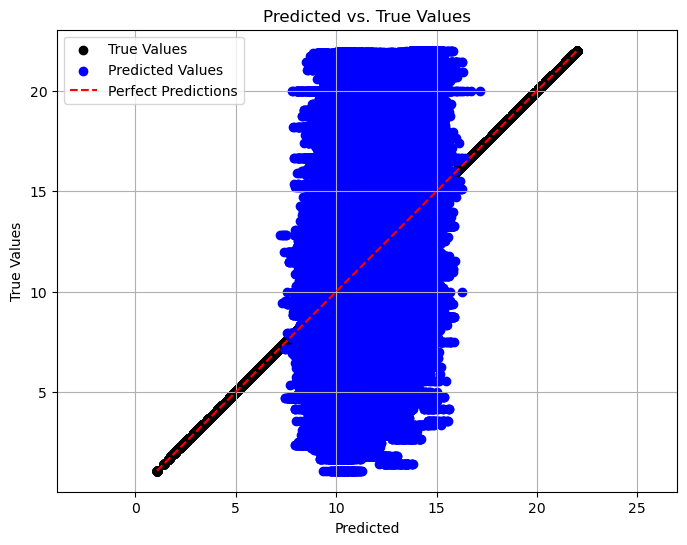

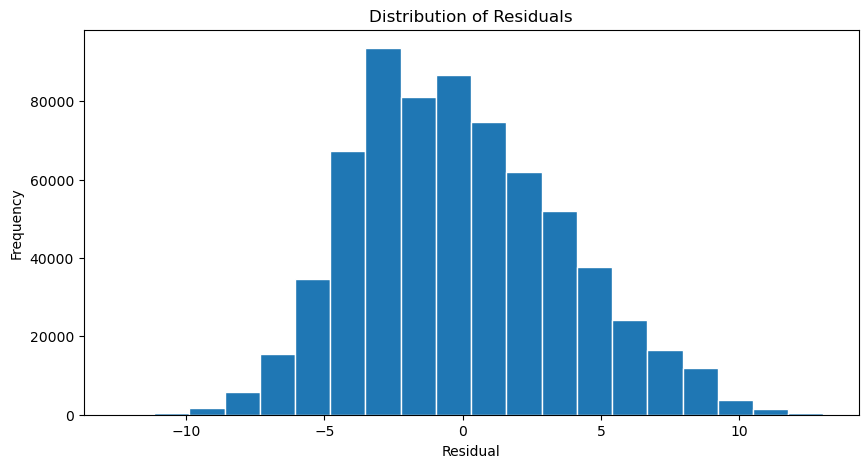

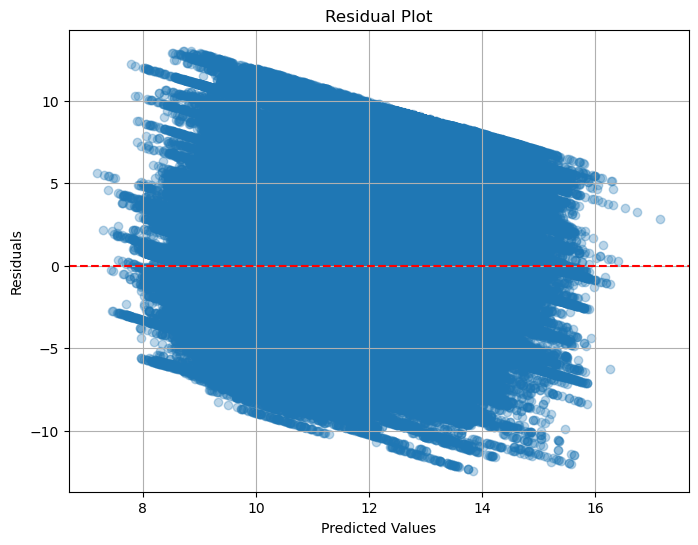

--- Metric Results Across Folds: ----
{'mean_squared_error': [14.097924421362663], 'root_mean_squared_error': [3.7547202853691597], 'mean_absolute_error': [3.057477202747178], 'r2_score': [0.1436476119814265]}
True values: [10.90909091  6.          8.12783587 ... 19.30693069 12.04735376
  6.25      ]
Predictions: [11.52155023 13.40086138 10.17145879 ... 14.58894517 11.49071075
  9.5670904 ]
Average MSE score: 14.097924421362663
Average r2 score: 0.1436476119814265
Average baseline MSE: 16.462760679610426
Average baseline r2: 0.0


In [24]:
test_years = [2015]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2016


 --- Year = 2016 --- 
MSE: 13.406695979800565
r2 score: 0.13434230949007708
Baseline MSE: 15.487294951314116
Baseline R2: 0.0


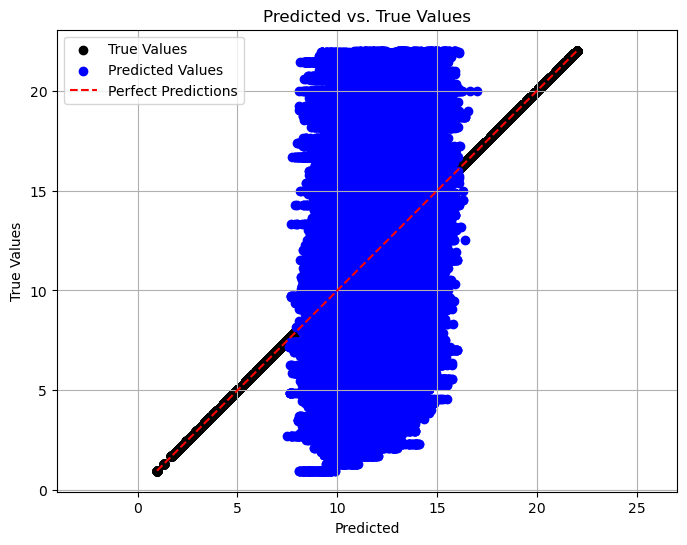

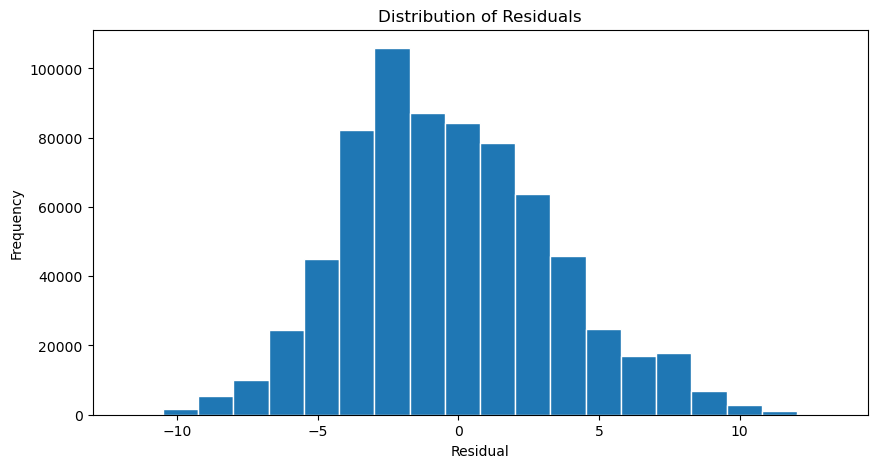

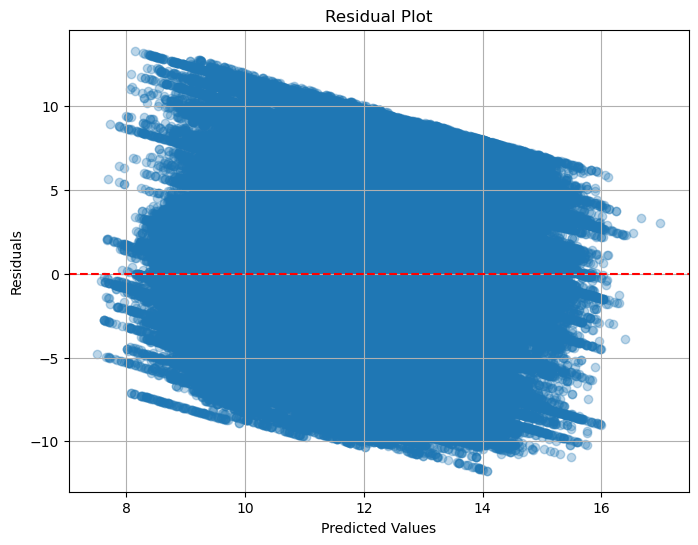

--- Metric Results Across Folds: ----
{'mean_squared_error': [13.406695979800565], 'root_mean_squared_error': [3.661515530460108], 'mean_absolute_error': [2.967464455608112], 'r2_score': [0.13434230949007708]}
True values: [ 8.14774579  8.47457627  7.43494424 ... 14.37728938 12.
  9.17445985]
Predictions: [ 8.84359804  9.79561545 13.88313991 ... 11.86518522  8.63228268
 12.45393829]
Average MSE score: 13.406695979800565
Average r2 score: 0.13434230949007708
Average baseline MSE: 15.487294951314116
Average baseline r2: 0.0


In [25]:
test_years = [2016]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2017


 --- Year = 2017 --- 
MSE: 13.053999137010958
r2 score: 0.14031618911528154
Baseline MSE: 15.18465157972071
Baseline R2: 0.0


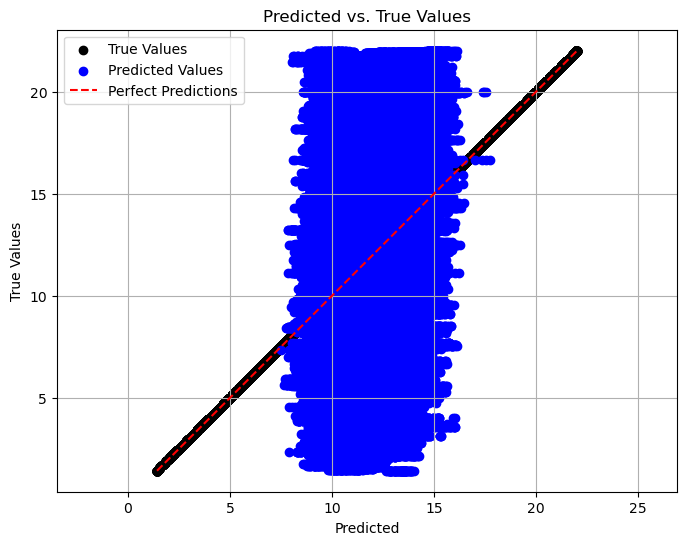

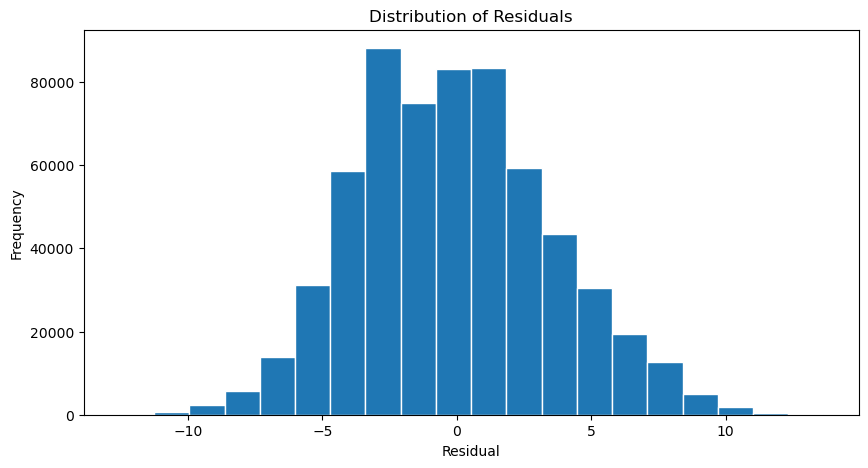

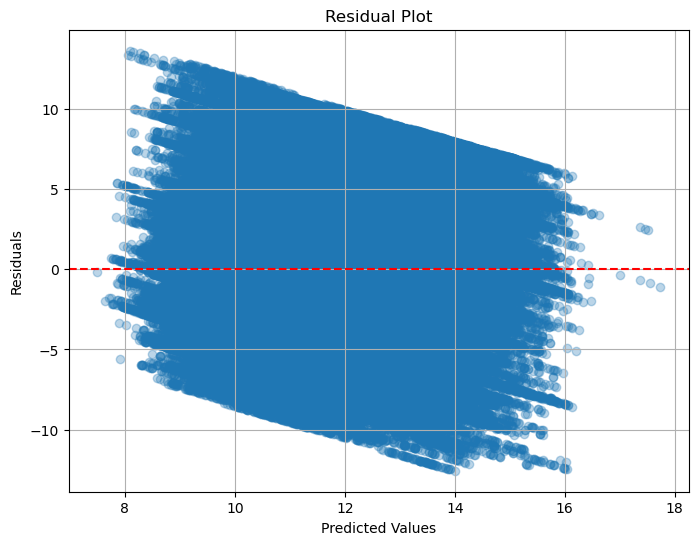

--- Metric Results Across Folds: ----
{'mean_squared_error': [13.053999137010958], 'root_mean_squared_error': [3.6130318483250266], 'mean_absolute_error': [2.918038124427756], 'r2_score': [0.14031618911528154]}
True values: [10.62590975 14.03353928 13.29639889 ... 20.16129032  9.47546531
 10.44776119]
Predictions: [10.02470243 13.11534843 12.12391192 ... 15.20093183 12.19012332
 11.36048345]
Average MSE score: 13.053999137010958
Average r2 score: 0.14031618911528154
Average baseline MSE: 15.18465157972071
Average baseline r2: 0.0


In [26]:
test_years = [2017]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test 2015-2017


 --- Year = 2015 --- 
MSE: 14.097924421362663
r2 score: 0.1436476119814265
Baseline MSE: 16.462760679610426
Baseline R2: 0.0

 --- Year = 2016 --- 
MSE: 13.452529055915168
r2 score: 0.13138291107617195
Baseline MSE: 15.487294951314116
Baseline R2: 0.0

 --- Year = 2017 --- 
MSE: 13.158542696396255
r2 score: 0.13343137132170668
Baseline MSE: 15.18465157972071
Baseline R2: 0.0


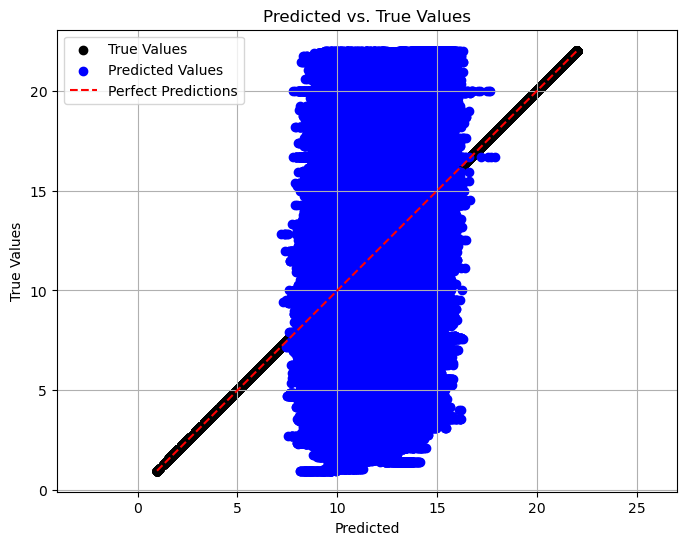

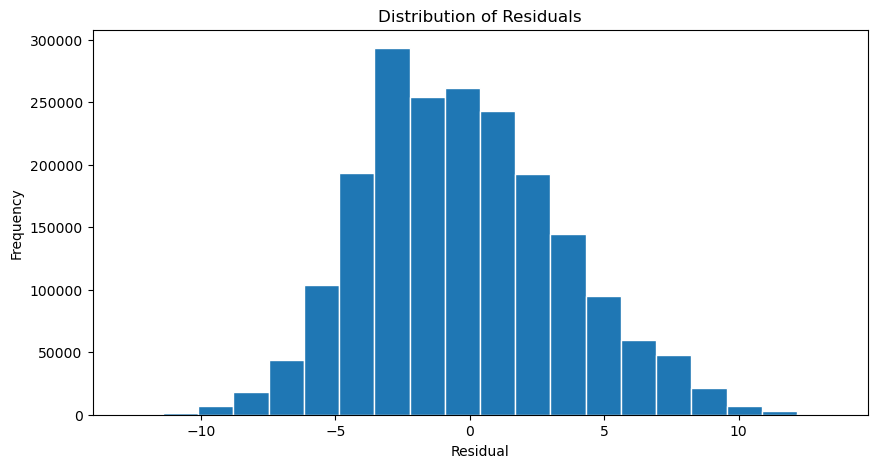

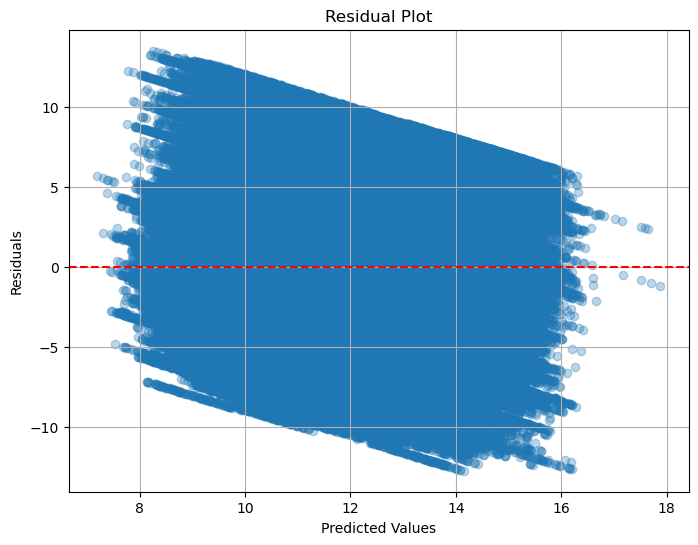

--- Metric Results Across Folds: ----
{'mean_squared_error': [14.097924421362663, 13.452529055915168, 13.158542696396255], 'root_mean_squared_error': [3.7547202853691597, 3.6677689480002917, 3.627470564511345], 'mean_absolute_error': [3.057477202747178, 2.9755140379821934, 2.934275305220637], 'r2_score': [0.1436476119814265, 0.13138291107617195, 0.13343137132170668]}
True values: [10.62590975 14.03353928 13.29639889 ... 20.16129032  9.47546531
 10.44776119]
Predictions: [10.20605517 13.28295295 12.31179484 ... 15.34185104 12.32954143
 11.60059194]
Average MSE score: 13.569665391224696
Average r2 score: 0.1361539647931017
Average baseline MSE: 15.711569070215084
Average baseline r2: 0.0


In [27]:
test_years = [2015, 2016, 2017]
true_values, predicted_values = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)